In [1]:
import subprocess
from IPython.display import Image

prestr = r'''\documentclass[border={BORDERLEFTpx 2px 2px 2px}]{standalone}

\usepackage{qcircuit}
\usepackage{physics}

\begin{document}

'''

poststr = r'''
\end{document}
'''

def create_diagram(body, filename, leftborder=20):
    
    prestr_final = prestr.replace('BORDERLEFT', str(leftborder), 1)
    
    docstr = prestr_final + body + poststr
    
    subprocess.run(["rm", '-f', '/tmp/texfile.tex'])
    
    subprocess.run(["rm", '-f', '/tmp/texfile.pdf'])

    with open('/tmp/texfile.tex', 'w') as texfile:
        texfile.write(docstr)

    subprocess.run(["pdflatex", '-output-directory', '/tmp', '/tmp/texfile.tex'],
                   stdout=subprocess.DEVNULL,
                   stderr=subprocess.STDOUT)

    subprocess.run(['pdftoppm', '-png', '-singlefile', '/tmp/texfile.pdf', filename],
                  stdout=subprocess.DEVNULL,
                   stderr=subprocess.STDOUT)

    display(Image(filename=filename+'.png'))


In [2]:
import tikz as tikz

In [4]:
pic = tikz.Picture()
pic.node("Alice", at=(0,0), name='alice', draw=True)
pic.node("Noisy channel", at=(6,0), name='channel',draw=True)
pic.node("Bob", at=(12,0), name='bob',draw=True)
pic.draw('(alice)', tikz.lineto('(channel)'),
         tikz.node('information', above='2pt', pos=0.5), opt='->')
pic.draw('(channel)', tikz.lineto('(bob)'),
         tikz.node('corrupted information', above='2pt', pos=0.5), opt='->')
pic.write_image('errorcorrectionmodel.png', dpi=180)

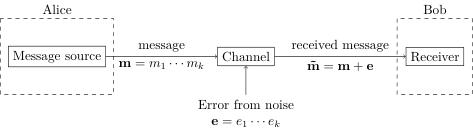

In [144]:
pic = tikz.Picture()
pic.node('Message source', at=(0,0), name='message', draw=True)
pic.node('Channel', at=(5,0), name='channel', draw=True)
pic.node('Receiver', at=(10,0), name='receiver', draw=True)

pic.node(r'Error from noise\\$\mathbf{e} = e_1\cdots e_k$', at=(5,-1.5), name='error', align='center')

pic.draw('(message)', tikz.lineto('(channel)'),
         tikz.node('message', above='0pt', pos=0.5),
         tikz.node('$\mathbf{m} = m_1\cdots m_k$', below='0pt', pos=0.5),
         opt='->')
pic.draw('(channel)', tikz.lineto('(receiver)'),
         tikz.node('received message', above='0pt', pos=0.5),
         tikz.node(r'$\mathbf{\tilde{m}} = \mathbf{m} + \mathbf{e}$', below='0pt', pos=0.5),
         opt='->')
pic.draw('(error)', tikz.lineto('(channel)'),
         opt='->')

pic.draw((-1.5,1), tikz.rectangle((1.5,-1)), opt='dashed')
pic.node('Alice', at=(0,1.25), align='center')

pic.draw((9,1), tikz.rectangle((11,-1)), opt='dashed')
pic.node('Bob', at=(10,1.25), align='center')

pic.write_image('noclassicalerrorcorrection.png', dpi=180)
pic

In [135]:
pic = tikz.Picture()
pic.node('Message source', at=(0,0), name='message', draw=True)
pic.node('Encoder', at=(5,0), name='encoder', draw=True)
pic.node('Channel', at=(10,0), name='channel', draw=True)
pic.node('Decoder', at=(15,0), name='decoder', draw=True)
pic.node('Receiver', at=(20,0), name='receiver', draw=True)

pic.node(r'Error from noise\\$\mathbf{e} = e_1\cdots e_n$', at=(10,-1.5), name='error', align='center')

pic.draw('(message)', tikz.lineto('(encoder)'),
         tikz.node('message', above='0pt', pos=0.5),
         tikz.node('$\mathbf{m} = m_1\cdots m_k$', below='0pt', pos=0.5),
         opt='->')
pic.draw('(encoder)', tikz.lineto('(channel)'),
         tikz.node('codeword', above='0pt', pos=0.5),
         tikz.node('$\mathbf{c} = c_1\cdots c_n$', below='0pt', pos=0.5),
         opt='->')
pic.draw('(channel)', tikz.lineto('(decoder)'),
         tikz.node(r'corrupted\\codeword', above='0pt', pos=0.5, align='center'),
         tikz.node(r'$\mathbf{\tilde{c}} = \mathbf{c} + \mathbf{e}$', below='0pt', pos=0.5),
         opt='->')
pic.draw('(decoder)', tikz.lineto('(receiver)'),
         tikz.node('estimated message', above='0pt', pos=0.5),
         tikz.node(r'$\mathbf{\hat{m}}$', below='0pt', pos=0.5),
         opt='->')
pic.draw('(error)', tikz.lineto('(channel)'),
         opt='->')

pic.draw((-1.5,1), tikz.rectangle((6,-1)), opt='dashed')
pic.node('Alice', at=(2.25,1.25), align='center')

pic.draw((14,1), tikz.rectangle((21,-1)), opt='dashed')
pic.node('Bob', at=(17.5,1.25), align='center')



pic.write_image('classicalerrorcorrectionmodel.png', dpi=180)
# pic

In [7]:
pic = tikz.Picture()


for i in [0, 3.6]:
    pic.draw((i+1,0), tikz.rectangle((i+2, 1)), opt='')
    pic.draw((i+2.2,0), tikz.rectangle((i+3.2, 1)), opt='')
    pic.draw((i+3.4,0), tikz.rectangle((i+4.4, 1)), opt='')
    
pic.node(r'\Large Message', at=(4.5,1.35), name='message', align='center')
# pic.node(r'\large length $=K$', at=(4.5,-0.35), name='messagelength', align='center')

for i in [10, 14.6]:
    pic.draw((i+1,0), tikz.rectangle((i+2, 1)), opt='')
    pic.draw((i+2.2,0), tikz.rectangle((i+3.2, 1)), opt='')
    pic.draw((i+3.4,0), tikz.rectangle((i+4.4, 1)), opt='')

pic.node(r'\large Block 1', at=(12.7,1.35), name='block1', align='center')
pic.node(r'\large length $=k$', at=(12.7,-0.35), name='messagelength', align='center')

pic.node(r'\large Block 1', at=(17.3,1.35), name='block2', align='center')
pic.node(r'\large length $=k$', at=(17.3,-0.35), name='messagelength', align='center')

pic.draw((10.5,-0.75), tikz.rectangle((19.5,1.75)), opt='dashed')
pic.node(r'\large Message', at=(15,2), name='rightmessage', align='center')

pic.draw((8.1,0.5), tikz.lineto((10.4,0.5)),
         tikz.node('break', above='0pt', pos=0.5), opt='->')

# print(pic.code())
pic.write_image('messageblocks.png', dpi=180)

In [54]:
pic = tikz.Picture()

pic.draw((0, 0), tikz.circle(x_radius=0.65, y_radius=1))
pic.node(r'\large message\\space', at=(0,1.5), align='center')


pic.draw((4, 0), tikz.circle(x_radius=1.5, y_radius=2))
pic.node(r'\large codespace', at=(4,2.25), align='center')


pic.draw((4.5, -0.5), tikz.circle(x_radius=0.65, y_radius=1))
pic.node(r'\large code', at=(4,0.75), align='center')

pic.draw((0.7,0), tikz.lineto((3.75,-0.5)), opt='->')


pic.node(r'$\mathbf{m}$', at=(0,0), align='center')
pic.node(r'$\mathbf{c}$', at=(4.5,-0.5), align='center')
pic.node(r'$\mathbf{\tilde{c}}$', at=(3.5,1.5), align='center')



pic.write_image('cecspaces.png', dpi=180)
# pic

In [57]:
pic = tikz.Picture()
pic.draw((0, 0), tikz.circle(radius=2))
pic.draw((2.5, 0), tikz.circle(radius=2))
pic.draw((1.25, 2.5), tikz.circle(radius=2))

pic.node('$m_1$', at=(1.25,0))
pic.node('$m_2$', at=(0.25,1.5))
pic.node('$m_3$', at=(2.25,1.5))
pic.node('$m_4$', at=(1.25,1))

pic.node('$p_1$', at=(-0.5,-0.25))
pic.node('$p_2$', at=(3,-0.25))
pic.node('$p_3$', at=(1.25,3.25))


pic.write_image('hammingcode.png', dpi=120)

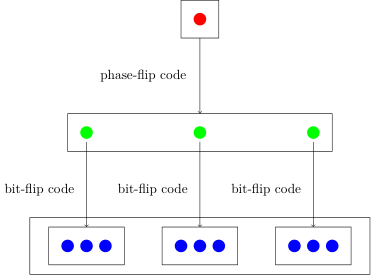

In [25]:

def centered_coords(num, center=0, spread=1):
    return[(i-(num-1)/2)*spread + center for i in range(num)]

def draw_block(pic,name,col,y,num,center=0,spread=1):
    if type(col) is str:
        col = [col]*num
    cc = centered_coords(num,center,spread)
    for i,x in zip(range(num),cc):
        pic.node("", at=(x,y), name=f'level0-{i}', fill=col[i], circle=True)
    pic.draw((cc[0]-0.5, y+0.5), tikz.rectangle((cc[-1]+0.5,y-0.5)), tikz.node(name, at=(cc[0]-1,y)))
    return pic, cc

pic = tikz.Picture()

(pic, cc1) = draw_block(pic, "",'red',0,1,0,1)
(pic, cc2) = draw_block(pic, "",'green',-3,3,0,3)
for j in range(3):
    (pic, cc3) = draw_block(pic,"",'blue',-6,3,cc2[j],0.5)
pic.draw((-4.5, -5.25), tikz.rectangle((4+0.5,-6.75)))


for x in cc2[1:-1]:
    pic.draw((0, -0.5), tikz.lineto((x, -2.5)), opt='->')
    
pic.node("phase-flip code", at=(-1.5,-1.5))

for x in cc2:
    pic.draw((x, -3.25), tikz.lineto((x, -5.5)), opt='->')
    
for x in cc2:
    pic.node("bit-flip code", at=(x-1.25,-4.5))

pic.write_image('shorcodeconcatenation.png', dpi=120)
pic

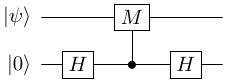

In [34]:
filename = 'NonDestructiveMeasurement'


body = r'''
\Qcircuit @C=1em @R=1em {
  \lstick{\ket{\psi}} & \qw      & \gate{M}  & \qw      & \qw \\
  \lstick{\ket{0}}    & \gate{H} & \ctrl{-1} & \gate{H} & \qw \\
}
'''

create_diagram(body, filename)

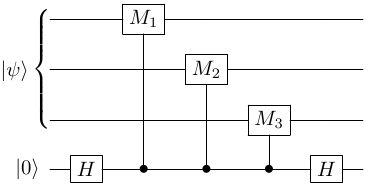

In [36]:
filename = 'NonDestructiveMeasurement-multi'


body = r'''
\Qcircuit @C=1em @R=1em {
  \lstick{}           & \qw      & \gate{M_1}  & \qw        & \qw         & \qw      & \qw \\
  \lstick{}           & \qw      & \qw         & \gate{M_2} & \qw         & \qw      & \qw \\
  \lstick{}           & \qw      & \qw         & \qw        & \gate{M_3}  & \qw      & \qw
    \inputgroupv{1}{3}{0.8em}{2.5em}{\ket{\psi}} \\
  \lstick{\ket{0}}    & \gate{H} & \ctrl{-3}   & \ctrl{-2}  & \ctrl{-1}   & \gate{H} & \qw \\
}
'''

create_diagram(body, filename)

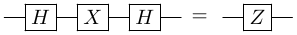

In [61]:
filename = 'Xconjugation'


body = r'''
\Qcircuit @C=1em @R=1em {
  & \gate{H} & \gate{X}  & \gate{H} & \rstick{=}\qw & \nghost{}  & \gate{Z} & \qw \\
}
'''

create_diagram(body, filename, 2)

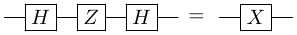

In [62]:
filename = 'Zconjugation'


body = r'''
\Qcircuit @C=1em @R=1em {
  & \gate{H} & \gate{Z}  & \gate{H} & \rstick{=}\qw & \nghost{}  & \gate{X} & \qw \\
}
'''

create_diagram(body, filename, 2)

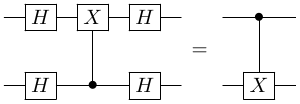

In [65]:
filename = 'CXidentity'


body = r'''
\Qcircuit @C=1em @R=1em {
  & \gate{H} & \gate{X}  & \gate{H} & \qw         & \nghost{}  & \ctrl{2} & \qw \\
  &          &           &          & \rstick{=}  &            &          &     \\
  & \gate{H} & \ctrl{-2} & \gate{H} & \qw         & \nghost{}  &  \gate{X}& \qw  \\
}
'''

create_diagram(body, filename, 2)

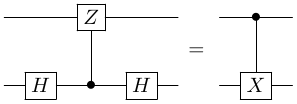

In [73]:
filename = 'CXidentity1'


body = r'''
\Qcircuit @C=1em @R=1em {
  & \qw      & \gate{Z}  & \qw      & \qw         & \nghost{}  & \ctrl{2} & \qw \\
  &          &           &          & \rstick{=}  &            &          &     \\
  & \gate{H} & \ctrl{-2} & \gate{H} & \qw         & \nghost{}  &  \gate{X}& \qw  \\
}
'''

create_diagram(body, filename, 2)

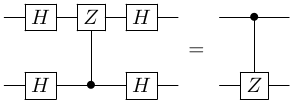

In [75]:
filename = 'CZidentity'


body = r'''
\Qcircuit @C=1em @R=1em {
  & \gate{H} & \gate{Z}  & \gate{H} & \qw         & \nghost{}  & \ctrl{2} & \qw \\
  &          &           &          & \rstick{=}  &            &          &     \\
  & \gate{H} & \ctrl{-2} & \gate{H} & \qw         & \nghost{}  &  \gate{Z}& \qw  \\
}
'''

create_diagram(body, filename, 2)

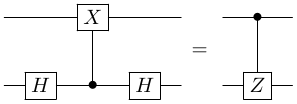

In [76]:
filename = 'CZidentity1'


body = r'''
\Qcircuit @C=1em @R=1em {
  & \qw      & \gate{X}  & \qw      & \qw         & \nghost{}  & \ctrl{2} & \qw \\
  &          &           &          & \rstick{=}  &            &          &     \\
  & \gate{H} & \ctrl{-2} & \gate{H} & \qw         & \nghost{}  &  \gate{Z}& \qw  \\
}
'''

create_diagram(body, filename, 2)

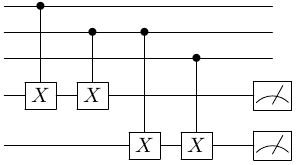

In [72]:
filename = 'repetitioncodesyndrome'


body = r'''
\Qcircuit @C=1em @R=1em {
& \ctrl{3}  & \qw      & \qw       & \qw      & \qw & \qw \\
& \qw       & \ctrl{2} & \ctrl{3}  & \qw      & \qw & \qw \\
& \qw       & \qw      & \qw       & \ctrl{2} & \qw & \qw \\
& \gate{X}  & \gate{X} & \qw       & \qw      & \qw & \meter \\
& \qw       & \qw      & \gate{X}  & \gate{X} & \qw & \meter \\
}
'''

create_diagram(body, filename, 2)

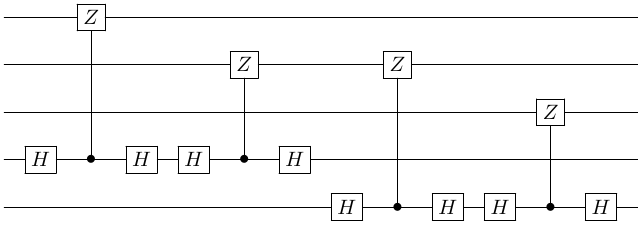

In [79]:
filename = 'repetitioncodesyndrome1'


body = r'''
\Qcircuit @C=1em @R=1em {
& \qw      & \gate{Z}  & \qw      & \qw      & \qw       & \qw      & \qw      & \qw       & \qw      & \qw      & \qw       & \qw      & \qw \\
& \qw      & \qw       & \qw      & \qw      & \gate{Z}  & \qw      & \qw      & \gate{Z}  & \qw      & \qw      & \qw       & \qw      & \qw \\
& \qw      & \qw       & \qw      & \qw      & \qw       & \qw      & \qw      & \qw       & \qw      & \qw      & \gate{Z}  & \qw      & \qw \\
& \gate{H} & \ctrl{-3} & \gate{H} & \gate{H} & \ctrl{-2} & \gate{H} & \qw      & \qw       & \qw      & \qw      & \qw       & \qw      & \qw \\
& \qw      & \qw       & \qw      & \qw      & \qw       & \qw      & \gate{H} & \ctrl{-3} & \gate{H} & \gate{H} & \ctrl{-2} & \gate{H} & \qw \\
}
'''

create_diagram(body, filename, 2)

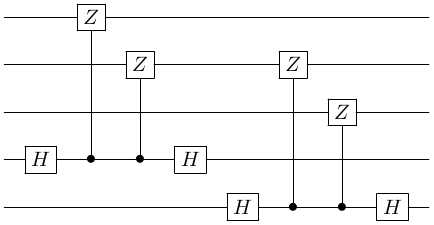

In [81]:
filename = 'repetitioncodesyndrome2'


body = r'''
\Qcircuit @C=1em @R=1em {
& \qw      & \gate{Z}  & \qw       & \qw      & \qw      & \qw       & \qw       & \qw      & \qw \\
& \qw      & \qw       & \gate{Z}  & \qw      & \qw      & \gate{Z}  & \qw       & \qw      & \qw \\
& \qw      & \qw       & \qw       & \qw      & \qw      & \qw       & \gate{Z}  & \qw      & \qw \\
& \gate{H} & \ctrl{-3} & \ctrl{-2} & \gate{H} & \qw      & \qw       & \qw       & \qw      & \qw \\
& \qw      & \qw       & \qw       & \qw      & \gate{H} & \ctrl{-3} & \ctrl{-2} & \gate{H} & \qw \\
}
'''

create_diagram(body, filename, 2)